<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #10: Recommender Systems

<span style="color:blue; font-size: 12pt">Andrey Saitgalin </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> andrey.saitgalin@gmail.com </span>

<h1 align="center">Organization Info</h1> 

* Дедлайн **18 декабря 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 494_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task10.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``


--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было.

<h1 align="center">Contest (100%)</h1> 
* Ссылка на контест: https://www.kaggle.com/t/f37413eb448145acba822f3a8c43946d

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('kaggle_data/train.csv')

In [3]:
train_data.head()

,rating,movieId,userId
0,3.0,2158,10953099004185006703
1,3.5,12959,10953099004185006703
2,3.5,7808,10953099004185006703
3,4.0,9049,4762492897681260571
4,3.0,12363,2110017552365950661


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

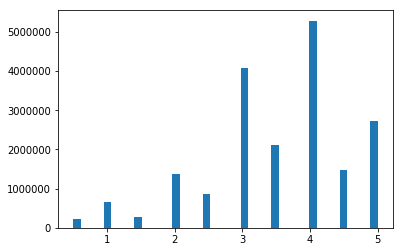

In [5]:
plt.hist(train_data['rating'], bins=40);

In [6]:
test_data = pd.read_csv('kaggle_data/test.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
test_data.head()

,Id,movieId,userId
0,1,939,3128775.0
1,2,19,60588779.0
2,3,1213,278728.0
3,4,1141,141994.0
4,5,2935,595805.0


Пересечение по `userId` - пустое множество.

In [9]:
set.intersection(set(train_data['userId'].values), set(list(map(lambda x: '{:.0f}'.format(x), test_data['userId'].values))))

set()

In [10]:
len(set.intersection(set(train_data['movieId'].values), set(test_data['movieId'].values)))

9803

In [11]:
len(set(test_data['movieId'].values))

20161

In [12]:
mean_ratings = train_data.groupby('movieId')['rating'].mean()

In [13]:
tmp = 3.3

In [14]:
def quantize(tmp):
    delta = tmp - int(tmp)

    if delta >= 0.75:
        tmp = int(tmp) + 1
    elif delta >= 0.25 and delta < 0.75:
        tmp = int(tmp) + 0.5
    else:
        tmp = int(tmp)

    return tmp

In [61]:
quantize(tmp)

3.5

In [32]:
sample_data = pd.read_csv('kaggle_data/baseline.csv')

In [16]:
sample_data.head()

,Id,rating
0,1,4.067366
1,2,3.271977
2,3,3.930169
3,4,3.575967
4,5,3.582748


In [17]:
sample_data.iloc[0]

Id        1.000000
rating    4.067366
Name: 0, dtype: float64

In [42]:
movies = test_data['movieId'].values
movies = list(map(lambda x: str(x), movies))

In [48]:
mean_ratings_dict = dict(list(map(lambda x: (str(x[0]), x[1]), dict(mean_ratings).items())))

In [52]:
ratings = list(map(lambda x: mean_ratings_dict[x] if x in mean_ratings_dict else 3.5, movies))
ratings = list(map(lambda x: quantize(x), ratings))

In [54]:
test_data['rating'] = ratings

In [60]:
test_data[['Id', 'rating']].to_csv('submission2.csv', index=False)